### textblob for sentiment score

In [5]:
!pip install -q textblob

In [2]:
import pandas as pd
import nltk
import re
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from textblob import TextBlob
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/justhavefun/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Twitter Data

In [20]:
# covid tweets data: https://www.kaggle.com/gpreda/covid19-tweets
df = pd.read_csv('covid19_tweets.csv')

In [23]:
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [64]:
def clean_text(s):
    # lower case
    s = s.lower()
    # remove punctuation and digits
    s = re.sub('[^A-Za-z]+', ' ', s)
    # remove stop words and stemming
    STOP, STEMMER = stopwords.words('english'), PorterStemmer()
    s = " ".join([STEMMER.stem(word) for word in s.split() if word not in STOP])
    return s

def sentiment_scores(x):
    """
    return polarity and subjectivity
    """
    return TextBlob(x).sentiment[0]

In [66]:
# Clean text
df['text'] = df['text'].astype(str).apply(lambda x: clean_text(x))
# Calculate sentiment score
df['senti_score'] = df['text'].apply(sentiment_scores)

### Reference
* [sentiment tool](https://data-science-blog.com/blog/2018/11/04/sentiment-analysis-using-python/)
* [pyspark udf](https://medium.com/analytics-vidhya/congressional-tweets-using-sentiment-analysis-to-cluster-members-of-congress-in-pyspark-10afa4d1556e)


In [55]:
df[['text', 'senti_score']]

,text,senti_score
0,smell scent hand sanit today someon past would...,-0.2500
1,hey yank yankeespr mlb made sen player pay res...,0.0000
2,diane3443 wdunlap realdonaldtrump trump never ...,0.0000
3,brookbanktv one gift covid19 give appreci simp...,0.0000
4,25 juli media bulletin novel coronavirusupd co...,0.0000
...,...,...
179103,thank iamohmai nomin wearamask challeng nomin ...,0.0000
179104,2020 year insan lol covid19 http co y48np0yzgn,0.8000
179105,ctvnew power paint juan lucena tribut grandpar...,0.0000
179106,1 200 student test posit covid19 major univ ab...,0.0625


In [67]:
df.to_csv('tweets_with_sentiments.csv', index=False)

In [12]:
df = pd.read_csv('tweets_with_sentiments.csv')
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,senti_score
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,smell scent hand sanit today someon past would...,NaN,Twitter for iPhone,False,-0.25
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,hey yank yankeespr mlb made sen player pay res...,NaN,Twitter for Android,False,0.00
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,dian wdunlap realdonaldtrump trump never claim...,['COVID19'],Twitter for Android,False,0.00
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,brookbanktv one gift covid give appreci simpl ...,['COVID19'],Twitter for iPhone,False,0.00
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,juli media bulletin novel coronavirusupd covid...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False,0.00


In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

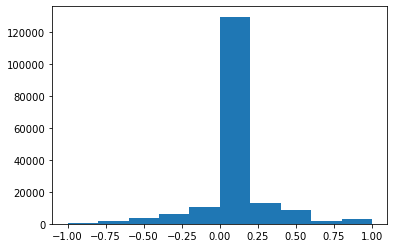

In [18]:
stats = plt.hist(df['senti_score'])

In [44]:
import numpy as np
np.mean(df['senti_score'])

0.05106570760200091

In [30]:
df['date'] = pd.to_datetime(df.date).dt.date
df_no_zero = df[df['senti_score']!=0]

In [59]:
senti_by_date = df.groupby('date').agg({'senti_score':'mean'})
senti_by_date_no_zero = df_no_zero.groupby('date').agg({'senti_score':'mean'})

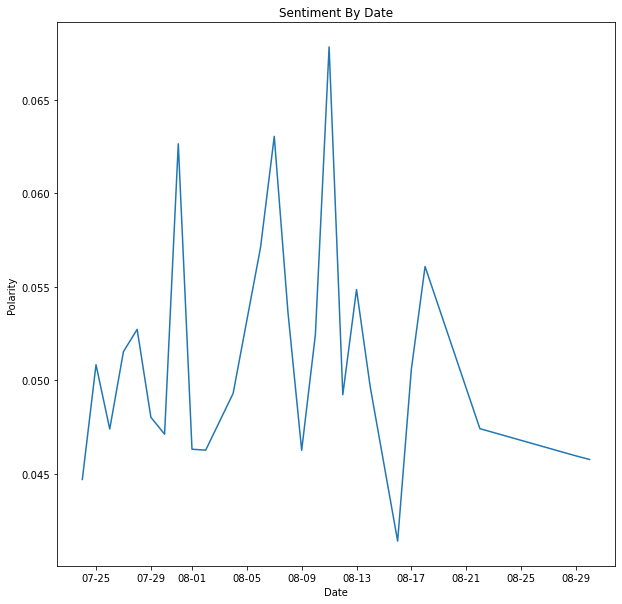

In [55]:
from matplotlib.dates import DateFormatter
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(senti_by_date.index, senti_by_date.senti_score)
ax.set_title('Sentiment By Date')
ax.set_xlabel('Date')
ax.set_ylabel('Polarity')
date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)

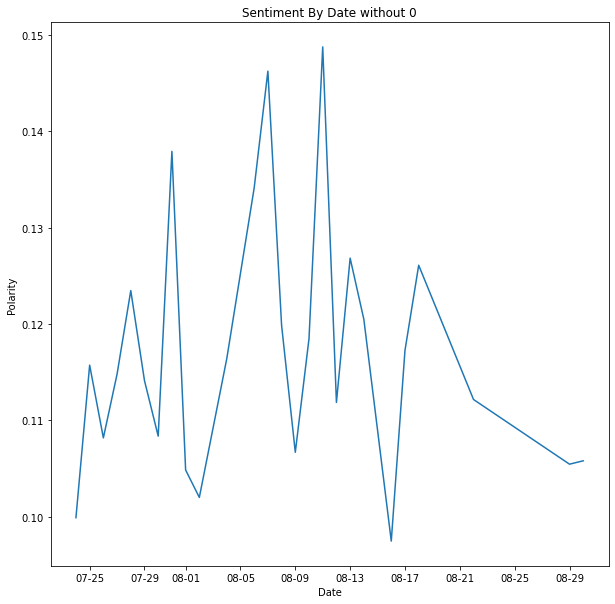

In [60]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(senti_by_date_no_zero.index, senti_by_date_no_zero.senti_score)
ax.set_title('Sentiment By Date without 0')
ax.set_xlabel('Date')
ax.set_ylabel('Polarity')
date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)